In [4]:
"""
Project 2: Data Extraction and Visualization
Dataset being worked on: total population by country and year.
"""

import pandas as pd
pd.options.plotting.backend = "matplotlib"
from matplotlib.pyplot import ylabel

df = pd.read_csv("../datasets/population_total.csv")
df.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


In [5]:
# Step 1: Making a Pivot Table

# In the DataFrame, the fictional country of "Micronesia" don't have a definite populations and years (i.e. year and population records being all empty)
df[df.population.isna() | df.year.isna()]

,country,year,population
1174,Micronesia,NaN,NaN
1175,Micronesia,NaN,NaN
1243,Micronesia,NaN,NaN
1244,Micronesia,NaN,NaN
1245,Micronesia,NaN,NaN
1310,Micronesia,NaN,NaN
1311,Micronesia,NaN,NaN


In [6]:
# Preprocessing step: Erase all columns with null values
df2 = df.dropna(inplace=None)
df2

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [7]:
# Make a Pivot table: reorganize table by given index/column values (without aggregation)
# Each column = a country, Each row = a year's record

# Set year column to int dtype so it looks cleaner (e.g 1960.0 -> 1960)
df2.loc[:, "year"] = df2.year.astype("int")
df2.loc[:, "population"] = df2.population.astype("int")

# Create pivot table: Each column = a country, Each row = a year's record
pivot = df2.pivot(index="year", columns="country", values="population")
pivot

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1955.0,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960.0,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965.0,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970.0,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975.0,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0
1980.0,13356511.0,2682690.0,19221665.0,32646.0,36067.0,8341289.0,7285.0,61865.0,27896528.0,3099754.0,...,2915389.0,15898757.0,115597.0,15182611.0,54281846.0,11231.0,150877.0,7941898.0,5851825.0,7408624.0
1985.0,11938208.0,2969672.0,22431502.0,39519.0,44600.0,9961997.0,7293.0,61786.0,30216279.0,3335940.0,...,3011519.0,18061284.0,129984.0,17319520.0,60896721.0,13622.0,182421.0,9572175.0,6923149.0,8877489.0
1990.0,12412308.0,3286073.0,25758869.0,47347.0,54509.0,11848386.0,8899.0,62528.0,32618651.0,3538171.0,...,3109601.0,20398348.0,146573.0,19632665.0,67988862.0,13800.0,217258.0,11709993.0,8036845.0,10432421.0
1995.0,18110657.0,3112936.0,28757785.0,53161.0,63850.0,13945206.0,9866.0,68670.0,34828170.0,3217348.0,...,3224281.0,22791026.0,168158.0,21931084.0,74910461.0,14149.0,255634.0,14913315.0,9096607.0,11410714.0


In [8]:
# Get population of Vietnam over the years

pivot.Vietnam

year
1955.0    28147443.0
1960.0    32670039.0
1965.0    37858951.0
1970.0    43404793.0
1975.0    48718189.0
1980.0    54281846.0
1985.0    60896721.0
1990.0    67988862.0
1995.0    74910461.0
2000.0    79910412.0
2005.0    83832661.0
2010.0    87967651.0
2015.0    92677076.0
2016.0    93640422.0
2017.0    94600648.0
2018.0    95545962.0
2019.0    96462106.0
2020.0    97338579.0
Name: Vietnam, dtype: float64

In [9]:
# Select some countries

pivot[['United States', 'China', 'Russia', 'North Korea']]

country,United States,China,Russia,North Korea
year,,,,
1955.0,171685336.0,6.122416e+08,111355300.0,10086991.0
1960.0,186720571.0,6.604081e+08,119871700.0,11424176.0
1965.0,199733676.0,7.242190e+08,126503736.0,12547525.0
1970.0,209513341.0,8.276014e+08,130148653.0,14410400.0
1975.0,219081251.0,9.262409e+08,133804858.0,16274740.0
1980.0,229476354.0,1.000089e+09,138053150.0,17472140.0
1985.0,240499825.0,1.075589e+09,142957284.0,18877238.0
1990.0,252120309.0,1.176884e+09,147531561.0,20293054.0
1995.0,265163745.0,1.240921e+09,148227466.0,21862299.0


<Axes: xlabel='year'>

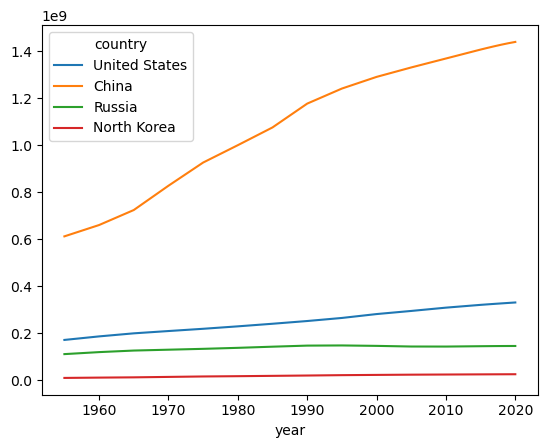

In [10]:
"""
Data Visualization!

01. Line plotting
"""

# Command: df.plot(kind='line' | 'bar' | 'barh' | 'pie' | 'density' | 'scatter' | ...)

# Plot a line showing population over the years for four countries
pivot[['United States', 'China', 'Russia', 'North Korea']].plot(kind="line")

<Axes: title={'center': 'Population (1955-2020)'}, xlabel='Year', ylabel='Population'>

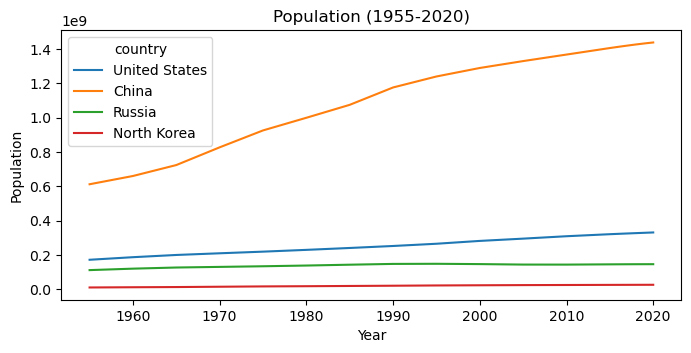

In [11]:
# Assign custom axis labels, title and figure size
# axis label: xlabel str, ylabel str
# title: str
# figure size: figsize (width, height)
pivot[['United States', 'China', 'Russia', 'North Korea']].plot(kind="line", xlabel="Year", ylabel="Population", title="Population (1955-2020)", figsize=(8, 3.5))

In [12]:
"""
02. Bar plotting
"""

# Select only one year (2015)
df_2015 = pivot[pivot.index.isin([2015])]
df_2015

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2015.0,34413603.0,2890513.0,39728025.0,55812.0,78011.0,27884381.0,14279.0,93566.0,43075416.0,2925553.0,...,3412009.0,30929557.0,271130.0,30081829.0,92677076.0,12266.0,526216.0,26497889.0,15879361.0,13814629.0


In [13]:
# Make barplot
# To plot a bar, each value's label must be an index, NOT a column
# Move index -> column and vice versa: use transposition
# Transpose: df.T

df_2015_t = df_2015.T
df_2015_t

year,2015.0
country,
Afghanistan,34413603.0
Albania,2890513.0
Algeria,39728025.0
American Samoa,55812.0
Andorra,78011.0
...,...
Wallis & Futuna,12266.0
Western Sahara,526216.0
Yemen,26497889.0


<Axes: xlabel='country'>

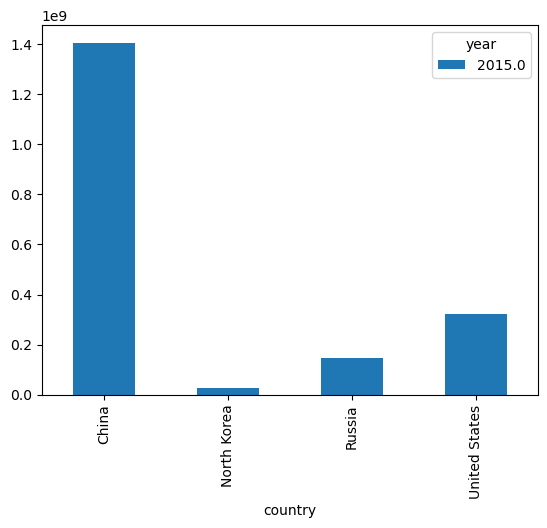

In [14]:
# Plot the 2015 population for certain countries

# In a bar chart: indices are mapped to the entries on x-axis, while columns are mapped to series
df_2015_t[df_2015_t.index.isin(["United States", "China", "Russia", "North Korea"])].plot(kind="bar")

<Axes: xlabel='year'>

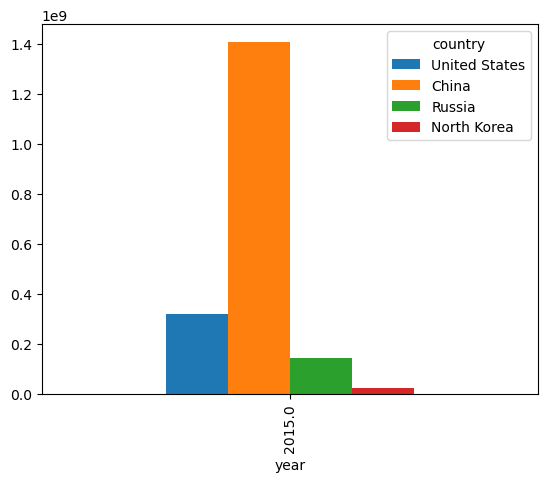

In [15]:
# Try with non-transposed data

# Countries -> Series, Years -> Entries in x-axis
df_2015[["United States", "China", "Russia", "North Korea"]].plot(kind="bar")

<Axes: title={'center': '2015 Population by Country'}, xlabel='Country', ylabel='Population'>

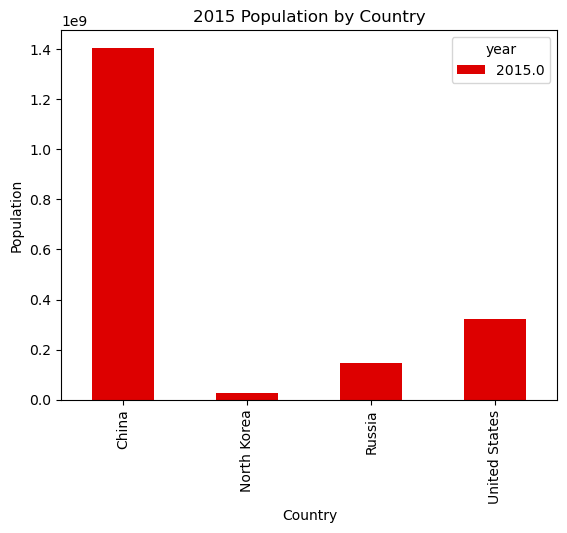

In [16]:
# Customize barplot: xlabel, ylabel, color, etc.

df_2015_t[df_2015_t.index.isin(["United States", "China", "Russia", "North Korea"])].plot(kind="bar", xlabel="Country", ylabel="Population", title="2015 Population by Country", color="#dd0000")

In [17]:
# Barplot grouped by "n" variables

## Selecting population for a few years (2000 - 2020)
piv_2 = pivot.loc[2000.0 : 2020.0]
piv_2

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
2000.0,20779953.0,3129243.0,31042235.0,57821.0,65390.0,16395473.0,11252.0,76016.0,36870787.0,3069591.0,...,3319736.0,24769955.0,184972.0,24192446.0,79910412.0,14694.0,314118.0,17409072.0,10415944.0,11881477.0
2005.0,25654277.0,3086810.0,33149724.0,59562.0,78867.0,19433602.0,12453.0,81465.0,38892931.0,2981269.0,...,3321803.0,26427789.0,209282.0,26432447.0,83832661.0,14939.0,437515.0,20107409.0,11856247.0,12076699.0
2010.0,29185507.0,2948023.0,35977455.0,56079.0,84449.0,23356246.0,13438.0,88028.0,40895752.0,2877319.0,...,3359275.0,28515909.0,236211.0,28439940.0,87967651.0,12689.0,480274.0,23154855.0,13605984.0,12697723.0
2015.0,34413603.0,2890513.0,39728025.0,55812.0,78011.0,27884381.0,14279.0,93566.0,43075416.0,2925553.0,...,3412009.0,30929557.0,271130.0,30081829.0,92677076.0,12266.0,526216.0,26497889.0,15879361.0,13814629.0
2016.0,35383032.0,2886438.0,40551392.0,55741.0,77297.0,28842489.0,14429.0,94527.0,43508460.0,2936143.0,...,3424129.0,31441751.0,278330.0,29851255.0,93640422.0,12107.0,538749.0,27168208.0,16363458.0,14030331.0
2017.0,36296113.0,2884169.0,41389189.0,55620.0,77001.0,29816766.0,14584.0,95426.0,43937140.0,2944791.0,...,3436641.0,31959785.0,285510.0,29402484.0,94600648.0,11900.0,552615.0,27834819.0,16853599.0,14236595.0
2018.0,37171921.0,2882740.0,42228408.0,55465.0,77006.0,30809787.0,14731.0,96286.0,44361150.0,2951745.0,...,3449285.0,32476244.0,292680.0,28887118.0,95545962.0,11661.0,567402.0,28498683.0,17351708.0,14438802.0
2019.0,38041754.0,2880917.0,43053054.0,55312.0,77142.0,31825295.0,14869.0,97118.0,44780677.0,2957731.0,...,3461734.0,32981716.0,299882.0,28515829.0,96462106.0,11432.0,582463.0,29161922.0,17861030.0,14645468.0
2020.0,38928346.0,2877797.0,43851044.0,NaN,NaN,32866272.0,NaN,97929.0,45195774.0,2963243.0,...,3473730.0,33469203.0,307145.0,28435940.0,97338579.0,NaN,597339.0,29825964.0,18383955.0,14862924.0


<Axes: xlabel='year'>

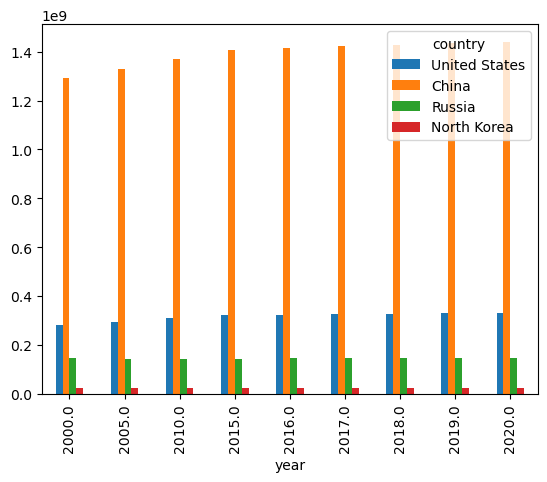

In [18]:
## Making the population bar plot for same 5 countries, grouped by years
## Each group: An index (row). Each series a column.
piv_2[["United States", "China", "Russia", "North Korea"]].plot(kind="bar")

In [19]:
"""
03. Pie chart

Input: DataFrame. Each row = a pie. Each section or portion on the pie corresponds to a column within that row.
"""

pivot.head()

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1955.0,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960.0,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965.0,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970.0,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975.0,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0


In [20]:
piv_2015 = pivot[pivot.index == 2015][["United States", "China", "Russia", "North Korea"]]
piv_2015

country,United States,China,Russia,North Korea
year,,,,
2015.0,320878310.0,1.406848e+09,144985057.0,25183833.0


<Axes: title={'center': 'Population 2015'}>

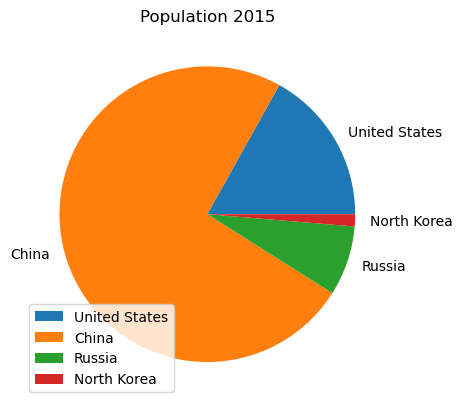

In [21]:
piv_2015.T.plot(kind="pie", y=0, title="Population 2015", ylabel="")
# Plot the first index of the pivot table (the 2015 row).
# Each row = a pie. Each section or portion on the pie corresponds to a column within that row.

In [22]:
"""
04. Boxplot

Shows how the data is spread out. Minimum, 1st quartile, Median, 3rd Quartile, Maximum value.
Input data: a Series.

"""

# Get population for the US
pivot["United States"]

year
1955.0    171685336.0
1960.0    186720571.0
1965.0    199733676.0
1970.0    209513341.0
1975.0    219081251.0
1980.0    229476354.0
1985.0    240499825.0
1990.0    252120309.0
1995.0    265163745.0
2000.0    281710909.0
2005.0    294993511.0
2010.0    309011475.0
2015.0    320878310.0
2016.0    323015995.0
2017.0    325084756.0
2018.0    327096265.0
2019.0    329064917.0
2020.0    331002651.0
Name: United States, dtype: float64

<Axes: ylabel='Population'>

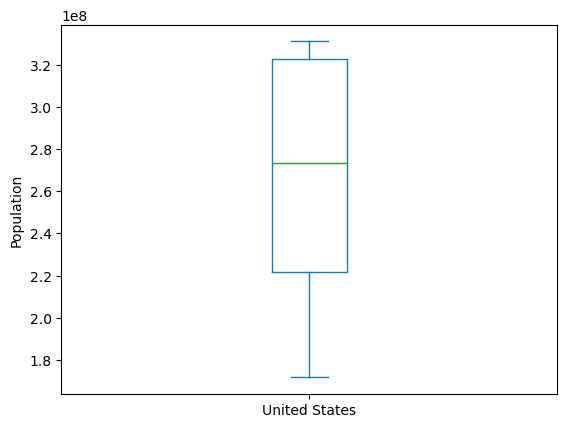

In [23]:
# Plot the data using box plot
pivot["United States"].plot(kind='box', ylabel='Population')

# Two ends: minimum, maximum
# Lower-end of the box: Q1
# Higher-end of the box: Q3
# Line in the middle of the box: Median
# The box: Inter-quartile range

<Axes: >

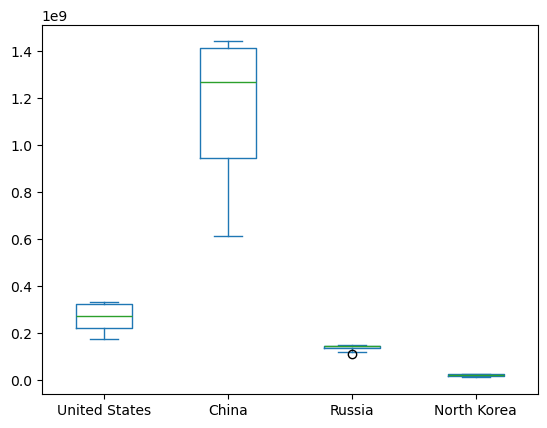

In [24]:
# More boxplots. Each column a boxplot
pivot[["United States", "China", "Russia", "North Korea"]].plot(kind="box")

<Axes: ylabel='Frequency'>

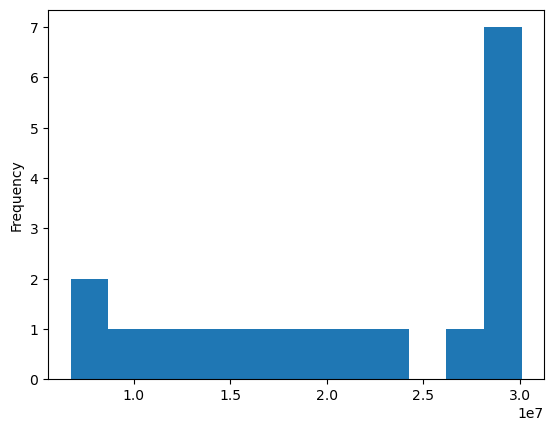

In [25]:
"""
05. Histogram

Takes a set of data points, and show frequency for each value range.
kind = "hist"
bins (int): number of histogram ranges ("bins") to be used
"""

pivot['Venezuela'].plot(kind="hist", bins=12)

<Axes: ylabel='Frequency'>

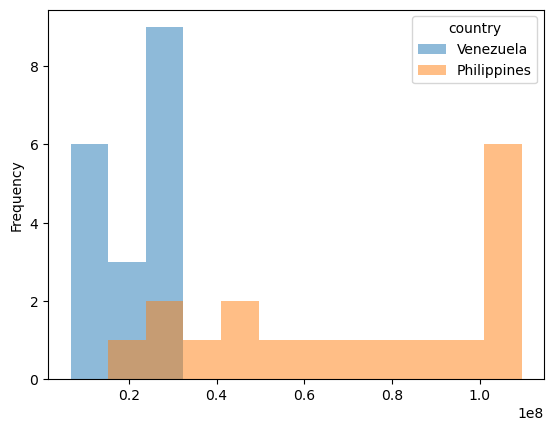

In [26]:
# Multiple histograms
pivot[['Venezuela', 'Philippines']].plot(kind="hist", bins=12, alpha=0.5)


In [27]:
"""
06. Scatterplot

Plot raw data.
Input structure: a DataFrame: one column assigned to x axis, another assigned to y axis.
"""

df_sample = df[df.country.isin(["Venezuela"])]

In [28]:
df_sample

,country,year,population
3383,Venezuela,2020.0,28435940.0
3384,Venezuela,2019.0,28515829.0
3385,Venezuela,2018.0,28887118.0
3459,Venezuela,2017.0,29402484.0
3460,Venezuela,2016.0,29851255.0
3461,Venezuela,2015.0,30081829.0
3462,Venezuela,2010.0,28439940.0
3533,Venezuela,2005.0,26432447.0
3534,Venezuela,2000.0,24192446.0
3535,Venezuela,1995.0,21931084.0


<Axes: xlabel='year', ylabel='population'>

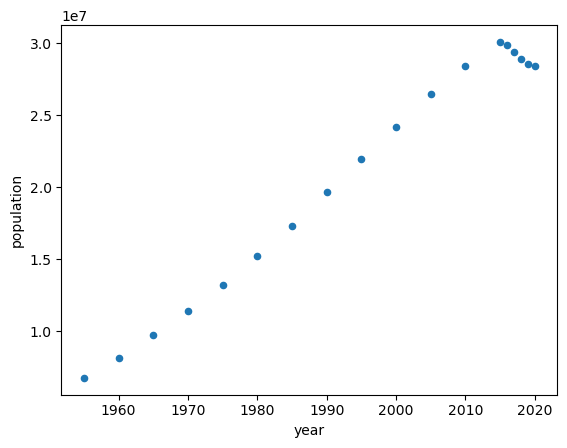

In [29]:
# Plot Venezuela population over years on a scatterplot
df_sample.plot(kind="scatter", x="year", y="population")

In [30]:
"""
Further plot interaction with matplotlib.
"""

import matplotlib.pyplot as plt

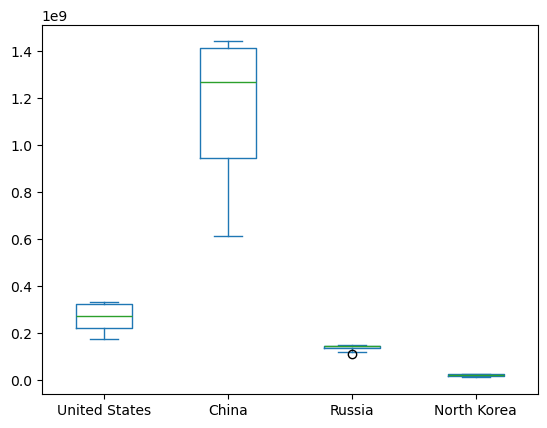

In [31]:
"""Exporting a plot"""
pivot[["United States", "China", "Russia", "North Korea"]].plot(kind="box")
plt.savefig("boxplot_demo.png")

In [32]:
"""Exporting PivotTable to .XLSX"""
pivot
pivot.to_excel("population_pivot_table.xlsx")

The .xlsx file exported from Pandas PivotTable

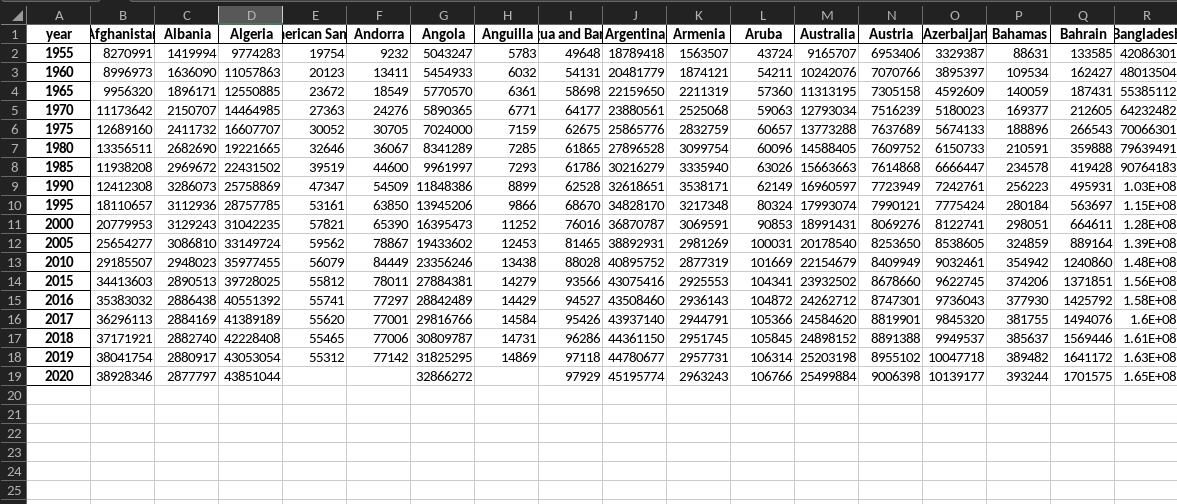

In [33]:
"""
Interactive visualization with Plotly and cufflinks
"""

# Import plotly (for interactive plots) and cufflinks (for binding plotly with pandas)
import cufflinks as cf
import plotly.offline as ly

# Enable cufflinks to work in the offline mode (e.g., in a Jupyter Notebook)
cf.go_offline()
ly.init_notebook_mode(connected=True)

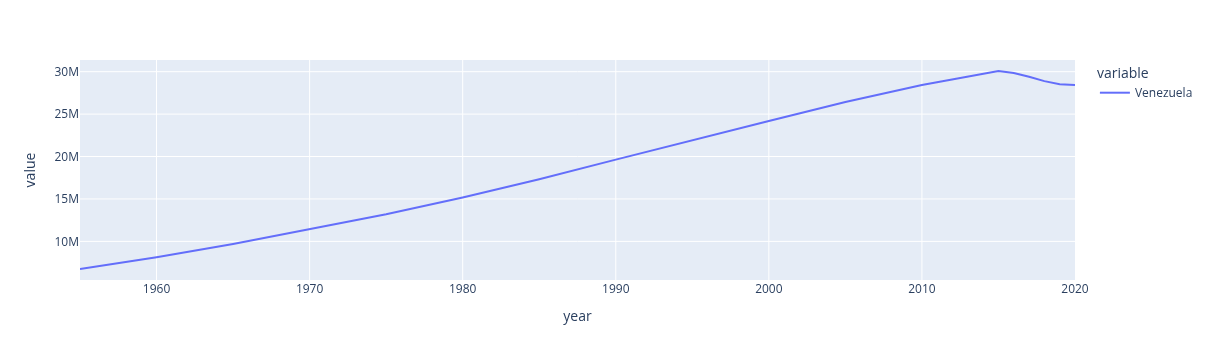

In [34]:
# Same pivot table, but with interactive plotting

# Due to compatibility issues with cufflinks and recent versions of Plotly, I bypassed the .iplot() method completely and switch
# the plotting backend to plotly

pd.options.plotting.backend = "plotly"
pivot["Venezuela"].plot(kind="line")

In [35]:
pivot[["Vietnam", "Laos", "Cuba"]]

country,Vietnam,Laos,Cuba
year,,,
1955.0,28147443.0,1890854.0,6539454.0
1960.0,32670039.0,2120898.0,7141250.0
1965.0,37858951.0,2382594.0,7958169.0
1970.0,43404793.0,2688428.0,8712541.0
1975.0,48718189.0,3051577.0,9446442.0
1980.0,54281846.0,3258144.0,9849459.0
1985.0,60896721.0,3687898.0,10097911.0
1990.0,67988862.0,4258472.0,10596987.0
1995.0,74910461.0,4846483.0,10888252.0


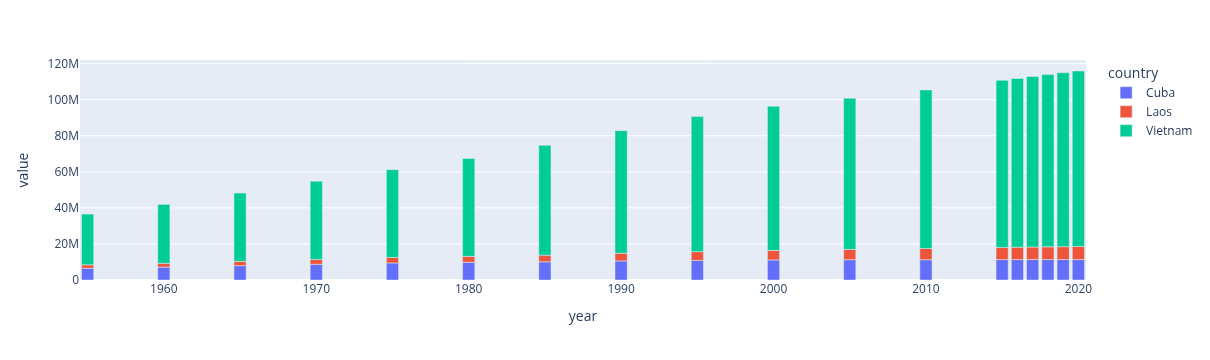

In [36]:
# Population bar chart
pivot[["Cuba", "Laos", "Vietnam"]].plot(kind="bar")

In [37]:
df_selected = pivot[["Laos", "Cuba", "Vietnam"]]
df_selected

country,Laos,Cuba,Vietnam
year,,,
1955.0,1890854.0,6539454.0,28147443.0
1960.0,2120898.0,7141250.0,32670039.0
1965.0,2382594.0,7958169.0,37858951.0
1970.0,2688428.0,8712541.0,43404793.0
1975.0,3051577.0,9446442.0,48718189.0
1980.0,3258144.0,9849459.0,54281846.0
1985.0,3687898.0,10097911.0,60896721.0
1990.0,4258472.0,10596987.0,67988862.0
1995.0,4846483.0,10888252.0,74910461.0


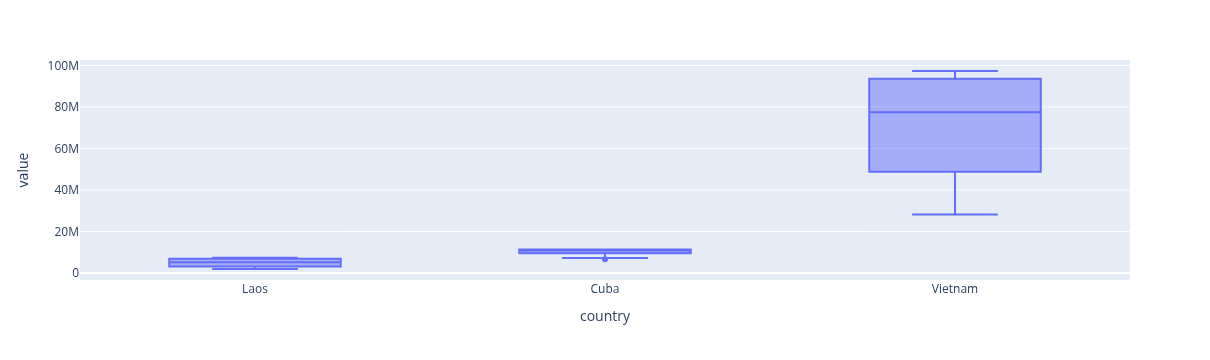

In [38]:
df_selected.plot(kind="box") # Hover to see Min/Max, Q1/Median/Q3 and Outliers (if any)

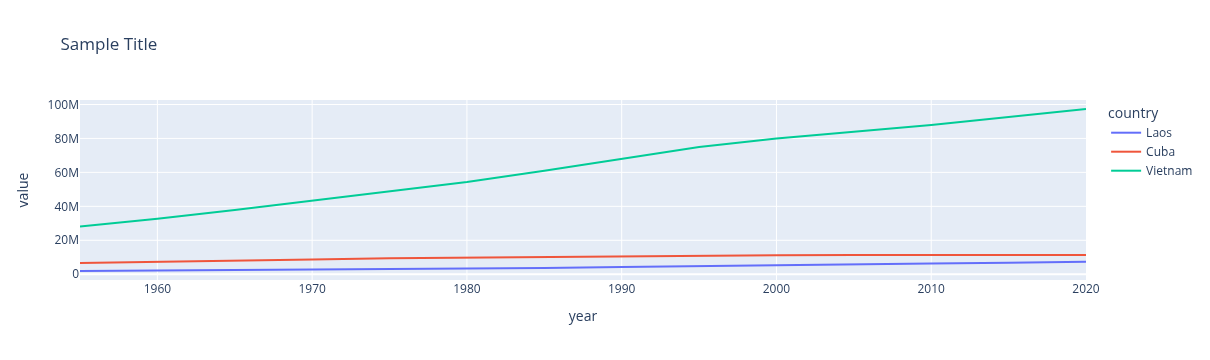

In [49]:
df_selected.plot(kind="line", title='Sample Title')

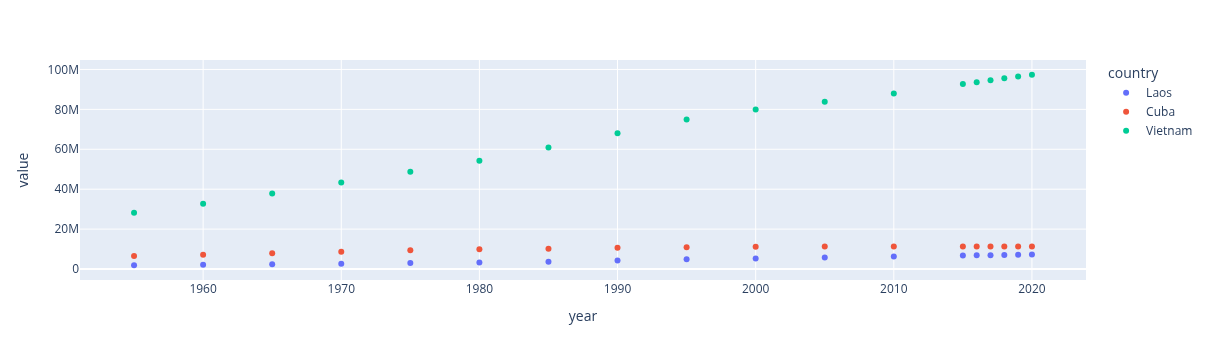

In [50]:
df_selected.plot(kind="scatter")

In [58]:
pivot[pivot.index.isin([2020])].T


year,2020.0
country,
Afghanistan,38928346.0
Albania,2877797.0
Algeria,43851044.0
American Samoa,NaN
Andorra,NaN
...,...
Wallis & Futuna,NaN
Western Sahara,597339.0
Yemen,29825964.0


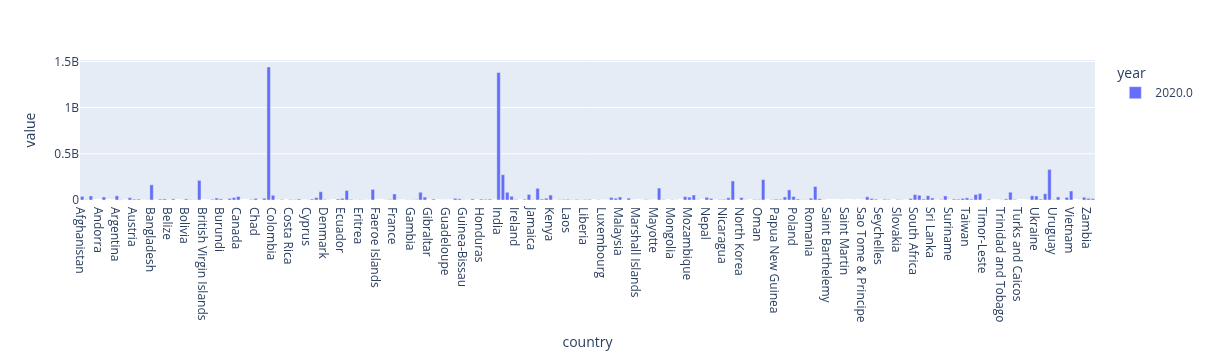

In [57]:
pivot[pivot.index.isin([2020])].T.plot(kind='bar')

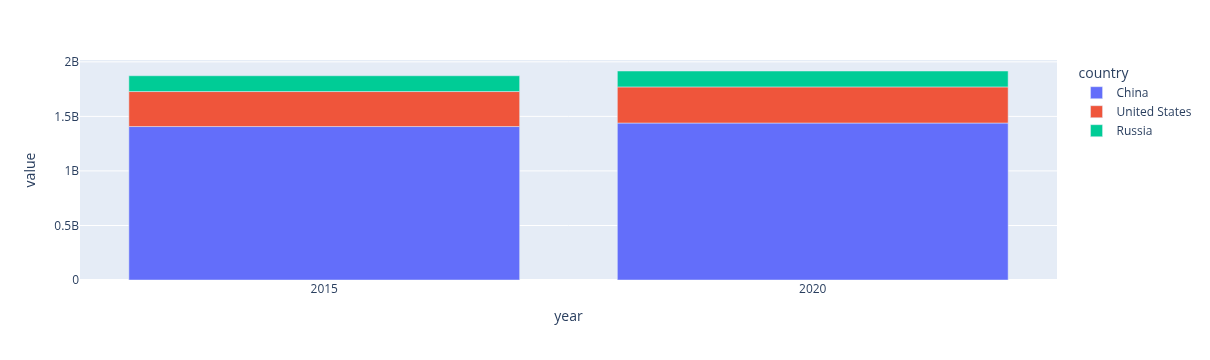

In [67]:
pivot[pivot.index.isin([2015, 2020])][["China", "United States", "Russia"]].plot(kind='bar')


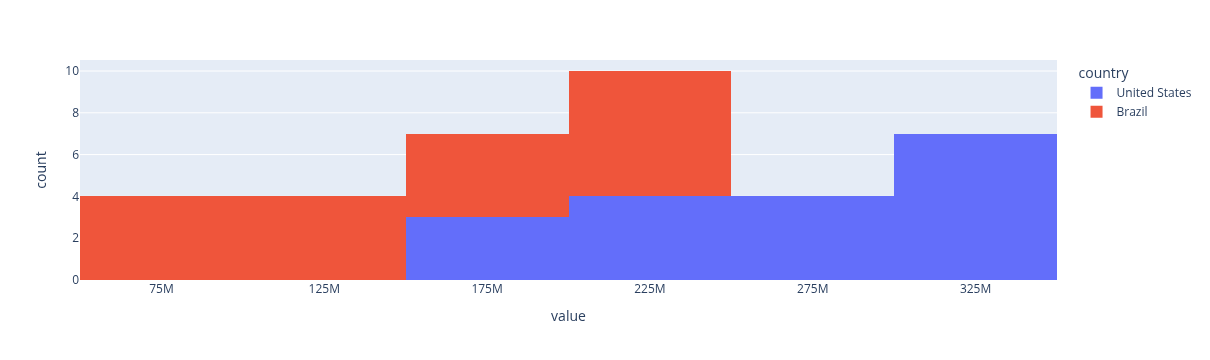

In [79]:
pivot[['United States', 'Brazil']].plot(kind='hist')

In [68]:
"""
Takeaways:
- matplotlib backend: static plots
- plotly backend: interactive plots: hover to see detailed data, pan/zoom, show/hide entries, exporting, etc. does not support certain plots (e.g bar)
"""

'\nTakeaways:\n- matplotlib backend: static plots\n- plotly backend: interactive plots: hover to see detailed data, pan/zoom, show/hide entries, exporting, etc. does not support certain plots (e.g bar)\n'